## Introduction to Pandas with US Election Data

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from csv import reader

### Campaign Finance

Today we will take a quick look at the 2016 election in the states and compare some campaign finance data on it. We'll use this as a way to get started with [Pandas](http://pandas.pydata.org/), a powerful data analysis library in Python.

The data files we will use are in the [data folder in this repository](https://github.com/kjam/random_hackery) or available for download on the [FEC site](http://www.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016). 

To begin, we need to extract the headers for the file, as they are not included in the data dumps.

In [4]:
cand_header = [r for r in 
               reader(open('data/cn_header_file.csv', 'r'))]

In [5]:
cand_header

[['CAND_ID',
  'CAND_NAME',
  'CAND_PTY_AFFILIATION',
  'CAND_ELECTION_YR',
  'CAND_OFFICE_ST',
  'CAND_OFFICE',
  'CAND_OFFICE_DISTRICT',
  'CAND_ICI',
  'CAND_STATUS',
  'CAND_PCC',
  'CAND_ST1',
  'CAND_ST2',
  'CAND_CITY',
  'CAND_ST',
  'CAND_ZIP']]

We can then pass this first list item along with the data to the [read_csv method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). We are using the sep keyword argument to define how our file is separated between fields.

This will create a [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [6]:
candidates = pd.read_csv(
    '/home/katharine/Downloads/datasets/cn.txt', 
    names=cand_header[0], sep='|')

In [7]:
candidates.head()

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,C,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


To take a look at columns, we can use the dataframe like a dictionary and pass the column name as the key. In return we get what is called a [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

In [8]:
candidates['CAND_NAME']

0                       COX, JOHN R.
1                       ROBY, MARTHA
2                  JOHN, ROBERT E JR
3          CRAMER, ROBERT E "BUD" JR
4                         BROOKS, MO
5                COOKE, STANLEY KYLE
6           SEWELL, TERRYCINA ANDREA
7        HILLIARD, EARL FREDERICK JR
8                   CHAMBERLAIN, DON
9           CRAWFORD, ERIC ALAN RICK
10        GREGORY, JAMES CHRISTOPHER
11                      CAUSEY, CHAD
12                SMITH, PRINCELLA D
13             GRIFFIN, JOHN TIMOTHY
14                ELLIOTT, JOYCE ANN
15      SKOCH, BERNARD KURT 'BERNIE'
16           WHITAKER, DAVID JEFFREY
17                     WOMACK, STEVE
18                 FALEOMAVAEGA, ENI
19                   FLAKE, JEFF MR.
20               GOSAR, PAUL ANTHONY
21                      MEHTA, STEVE
22                  TOBIN, ANDY HON.
23            GRESSLEY, FORREST DAYL
24                    PARKER, VERNON
25                       QUAYLE, BEN
26                 SCOTT, BRIAN ALAN
2

We can also use slicing and selecting to review either a Series or a DataFrame. There are a few different methods available. 

We can use a boolean selector which returns a truth Series or DataFrame.

In [9]:
candidates['CAND_ELECTION_YR'] == 2016

0       False
1        True
2        True
3       False
4        True
5       False
6        True
7       False
8       False
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7541    False
7542    False
7543    False
7544    False
7545    False
7546    False
7547    False
7548    False
7549    False
7550    False
7551    False
7552    False
7553     True
7554    False
7555    False
7556    False
7557    False
7558    False
7559    False
7560    False
7561    False
7562    False
7563    False
7564    False
7565    False
7566     True
7567    False
7568    False
7569     True
7570    False
Name: CAND_ELECTION_YR, dtype: bool

In [10]:
candidates[candidates['CAND_ELECTION_YR'] == 2016]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0
6,H0AL07086,"SEWELL, TERRYCINA ANDREA",DEM,2016,AL,H,7.0,I,C,C00458976,PO BOX 1964,NaN,BIRMINGHAM,AL,35201.0
9,H0AR01083,"CRAWFORD, ERIC ALAN RICK",REP,2016,AR,H,1.0,I,C,C00462374,34 CR 455,NaN,JONESBORO,AR,72404.0
17,H0AR03055,"WOMACK, STEVE",REP,2016,AR,H,3.0,I,C,C00477745,134 N PLEASANT RIDGE DRIVE,NaN,ROGERS,AR,727560701.0
20,H0AZ01259,"GOSAR, PAUL ANTHONY",REP,2016,AZ,H,4.0,I,C,C00461806,PO BOX 2967,NaN,PRESCOTT,AZ,86302.0
39,H0CA03078,"BERA, AMERISH",DEM,2016,CA,H,7.0,I,C,C00461061,PO BOX 582496,NaN,ELK GROVE,CA,95758.0
44,H0CA10073,"DESAULNIER, MARK",DEM,2016,CA,H,11.0,I,C,C00554709,POST OFFICE BOX 6066,NaN,CONCORD,CA,94524.0
47,H0CA10149,"GARAMENDI, JOHN",DEM,2016,CA,H,3.0,I,C,C00462697,1050 17TH ST NW STE 590,NaN,WASHINGTON,DC,20036.0


We can also simply select with indexing or slices.

Both [loc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) and [iloc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) methods can be very useful for selecting rows.

In [11]:
candidates[candidates['CAND_ELECTION_YR'] == 2016][
    ['CAND_ID', 'CAND_NAME']].head()

,CAND_ID,CAND_NAME
1,H0AL02087,"ROBY, MARTHA"
2,H0AL02095,"JOHN, ROBERT E JR"
4,H0AL05163,"BROOKS, MO"
6,H0AL07086,"SEWELL, TERRYCINA ANDREA"
9,H0AR01083,"CRAWFORD, ERIC ALAN RICK"


In [12]:
candidates.shape

(7571, 15)

In [13]:
candidates.loc[6940:]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
6940,S4KS00135,"TAYLOR, CHADWICK J",DEM,2014,KS,S,0.0,C,P,C00551895,6842 NW HUNTER RD,NaN,TOPEKA,KS,66618.0
6941,S4KS00150,"SMITH, DELLA JEAN",REP,2016,KS,S,0.0,C,N,C00565895,"1601 EAST PEORIA, PMB #182",NaN,PAOLA,KS,66071.0
6942,S4KY00083,"SCHONBERG, STEVE",DEM,2014,KY,S,0.0,C,N,C00541961,PO BOX 633,NaN,BELLEVIEW,FL,34420.0
6943,S4KY00091,"GRIMES, ALISON LUNDERGAN",DEM,2014,KY,S,0.0,C,P,C00547083,628 WEST HIGH STREET,NaN,LEXINGTON,KY,40508.0
6944,S4KY00109,"BEVIN, MATTHEW GRISWOLD",REP,2014,KY,S,0.0,C,P,C00547547,531 BARBERRY LANE,NaN,LOUISVILLE,KY,40206.0
6945,S4KY00158,"RECKTENWALD, TOM",DEM,2016,KY,S,0.0,C,N,NaN,PO BOX 16168,NaN,LOUISVILLE,KY,40256.0
6946,S4LA00040,"JOHN, CHRIS",DEM,2010,LA,S,0.0,C,P,C00394445,NaN,NaN,CROWLEY,LA,NaN
6947,S4LA00057,"VITTER, DAVID B",REP,2016,LA,S,0.0,I,C,C00394593,238 HELIOS AVENUE,NaN,METAIRIE,LA,70005.0
6948,S4LA00065,"KENNEDY, JOHN NEELY",REP,2016,LA,S,0.0,O,C,C00608398,26 DELOAKS,NaN,MADISONVILLE,LA,70447.0
6949,S4LA00107,"CASSIDY, WILLIAM M",REP,2020,LA,S,0.0,I,F,C00543983,PO BOX 80505,NaN,BATON ROUGE,LA,708980505.0


In [14]:
candidates.iloc[2]

CAND_ID                           H0AL02095
CAND_NAME                 JOHN, ROBERT E JR
CAND_PTY_AFFILIATION                    IND
CAND_ELECTION_YR                       2016
CAND_OFFICE_ST                           AL
CAND_OFFICE                               H
CAND_OFFICE_DISTRICT                      2
CAND_ICI                                  C
CAND_STATUS                               N
CAND_PCC                                NaN
CAND_ST1                1465 W OVERBROOK RD
CAND_ST2                                NaN
CAND_CITY                         MILLBROOK
CAND_ST                                  AL
CAND_ZIP                              36054
Name: 2, dtype: object

Because Pandas DataFrames are built upon NumPy datatypes, it's always a good idea to test your datatypes and see what they are. I usually do this early on so I can fix any bad imports.

In [15]:
candidates.dtypes

CAND_ID                  object
CAND_NAME                object
CAND_PTY_AFFILIATION     object
CAND_ELECTION_YR          int64
CAND_OFFICE_ST           object
CAND_OFFICE              object
CAND_OFFICE_DISTRICT    float64
CAND_ICI                 object
CAND_STATUS              object
CAND_PCC                 object
CAND_ST1                 object
CAND_ST2                 object
CAND_CITY                object
CAND_ST                  object
CAND_ZIP                float64
dtype: object

Remember: objects should really only represent strings, arrays or dicts. Everything else should be an integer or float or boolean or datetime.

These look okay since we actually have a lot of string data in this set.

## How might I find Donald Trump's data?







In [16]:
candidates[candidates['CAND_NAME'] == 'TRUMP, DONALD']

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


There are some cool string methods avialable, let's try one of those

In [17]:
candidates[candidates['CAND_NAME'].str.contains('TRUMP')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
5342,P60012184,"BALLSACK, DONALD TRUMP'S HAIRY KING",UST,2016,US,P,0.0,O,N,NaN,999 E STREET WEST,NaN,"WASHINGTON, DC",DC,20463.0
5449,P60013265,"TRUMP, SELAM MRS.",IDP,2016,US,P,0.0,O,N,C00585158,100 E. HILLCREST AVE APT 12,NaN,INGLEWOOD,CA,90301.0
6000,P60018835,"TRUMP, THE MUSLIM DICTATOR",REP,2016,US,P,0.0,O,N,NaN,725 5TH AVE,NaN,NEW YORK,NY,10022.0
6016,P60018991,"TRUMP, DON'T VOTE FOR",COM,2016,US,P,0.0,O,N,NaN,1090 MAIN ST.,NaN,NORWALK,IA,50211.0
6469,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


And we've found him. As well as some of his critics. 

Now that we know we can search and slice with Pandas, let's try merging this dataset with some actual campaign finance data. Onward!! :)

In [18]:
donations_header = [r for r in 
                    reader(open('data/indiv_header_file.csv', 
                                'r'))]

In [19]:
donations_header[0]

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

In [20]:
donations = pd.read_csv(
    '/home/katharine/Downloads/datasets/itcont.txt', 
    names=donations_header[0], sep='|')

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
donations.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015.0,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015.0,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015.0,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015.0,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015.0,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [22]:
donations.dtypes

CMTE_ID             object
AMNDT_IND           object
RPT_TP              object
TRANSACTION_PGI     object
IMAGE_NUM            int64
TRANSACTION_TP      object
ENTITY_TP           object
NAME                object
CITY                object
STATE               object
ZIP_CODE            object
EMPLOYER            object
OCCUPATION          object
TRANSACTION_DT     float64
TRANSACTION_AMT      int64
OTHER_ID            object
TRAN_ID             object
FILE_NUM             int64
MEMO_CD             object
MEMO_TEXT           object
SUB_ID               int64
dtype: object

These look about right. We can also use [describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to see some statistical representations of our data.

In [23]:
donations.describe()

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID
count,2.290560e+06,2.289915e+06,2.290560e+06,2.290560e+06,2.290560e+06
mean,1.879193e+17,5.525376e+06,1.044337e+03,1.048116e+06,3.829183e+18
std,5.066159e+16,3.257857e+06,2.924166e+04,7.968087e+04,6.999535e+17
min,1.402120e+10,4.103100e+04,-2.268000e+05,-9.418228e+06,1.010520e+18
25%,2.015102e+17,NaN,5.000000e+01,1.030683e+06,4.022420e+18
50%,2.016022e+17,NaN,2.500000e+02,1.051660e+06,4.050320e+18
75%,2.016042e+17,NaN,5.000000e+02,1.066979e+06,4.060220e+18
max,2.016060e+17,1.231202e+07,2.656953e+07,1.076172e+06,4.123120e+18


That's not a super helpful list of numbers, let's take a look at the transaction amount column more specifically. We can run many different statistical functions just on the Series itself.

In [24]:
donations['TRANSACTION_AMT'].mean()

1044.3368176341157

In [25]:
donations['TRANSACTION_AMT'].min()

-226800

In [26]:
donations['TRANSACTION_AMT'].max()

26569530

In [27]:
donations['TRANSACTION_AMT'].median()

250.0

We can also load [matplotlib](http://matplotlib.org/) in our session by using IPython magic command %pylab inline

Then plotting will be available within our notebook.

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([  2.29052200e+06,   3.10000000e+01,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  -226800.,   2452833.,   5132466.,   7812099.,  10491732.,
         13171365.,  15850998.,  18530631.,  21210264.,  23889897.,
         26569530.]),
 <a list of 10 Patch objects>)

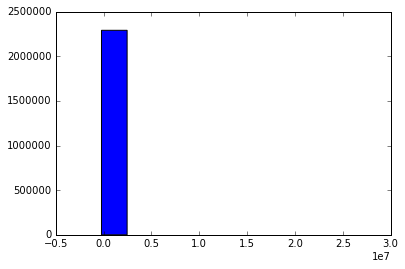

In [29]:
hist(donations['TRANSACTION_AMT'])

So we likely aren't going to see good distribution until we remove outliers. As we can see from the histogram the *vast* majority of donations are in a small section, but the outliers (both negative and positive) are making our histogram unreadable.

Since we might just want to look at one or two candidates and see the distribution there, let's first combine our dataframes and then look for outliers. This helps us tell more of the story as well, if we find that an overwhelming number of outliers for one candidate exist.

First, let's see how many of our candidates have a major political committee listed. We can use [shape](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) to take a look at how many rows we have in the resulting DataFrame.

In [30]:
candidates[candidates['CAND_PCC'].notnull()].shape

(5438, 15)

Not too bad! So let's now merge that in with the individual dataframe, and see what results we get when using a few different joins.

In [31]:
donations.set_index('CMTE_ID').join(
    candidates.set_index('CAND_PCC'))

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00000059,N,YE,P,201601269004607741,15,IND,"HALL, DONALD J. MR.",MISSION HILLS,KS,662081145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M2,P,201602229009616657,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M2,P,201602229009616657,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M3,P,201603189009789336,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M3,P,201603189009789336,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M4,P,201604199012594549,15,IND,"HALL, DAVID EARL",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M4,P,201604199012594550,15,IND,"HALL, DONALD J. JR.",KANSAS CITY,KS,64108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M5,P,201605209015570704,15,IND,"HALL, DAVID EARL MR.",MISSION HILLS,KS,662081146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000059,N,M5,P,201605209015570705,15,IND,"HALL, DONALD JOYCE MR. JR.",MISSION HILLS,KS,662081211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C00000422,N,M2,P,15970260203,15,IND,"HOLLEY, GLEN EDWARD MD",DALLAS,TX,752404908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, not a great sign. It looks like our committee IDs don't properly match. Let's try joining on the candidates table.

In [32]:
donations.set_index('CMTE_ID').join(
    candidates.set_index('CAND_PCC'), how='right')

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00002592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,WA,H,5.0,C,P,W 726 6TH AVENUE #301,NaN,SPOKANE,WA,99204.0
C00002600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MI,H,12.0,C,P,"700 13TH STREET, N.W.",SUITE 600,WASHINGTON,DC,20005.0
C00005041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,OH,H,16.0,C,P,8787 ERIE AVENUE SW,NaN,NAVARRE,OH,44662.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"TRICHE, CLARENCE",CUT OFF,LA,70345,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"WHITE, III, ROGER",HOUMA,LA,70360,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"ZANE, CURTIS",MC LEAN,VA,2.21012e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"ALCALDE, RICHARD",WASHINGTON,DC,2.00032e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BERTOSON, TODD",WASHINGTON,DC,2.00025e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BORDELON, BENJAMIN",RACELAND,LA,70394,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,1.595112e+10,15,IND,"BROWN, ANN",FAIRBANKS,AK,99709,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0


This is better, but now maybe I'm just curious about the candidates with donations, not the other ones without. We can use an inner join to do so.

In [33]:
donations.set_index('CMTE_ID').join(
    candidates.set_index('CAND_PCC'), how='inner')

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00012229,N,Q1,P,15951120698,15,IND,"TRICHE, CLARENCE",CUT OFF,LA,70345,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120698,15,IND,"WHITE, III, ROGER",HOUMA,LA,70360,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120698,15,IND,"ZANE, CURTIS",MC LEAN,VA,2.21012e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"ALCALDE, RICHARD",WASHINGTON,DC,2.00032e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"BERTOSON, TODD",WASHINGTON,DC,2.00025e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120685,15,IND,"BORDELON, BENJAMIN",RACELAND,LA,70394,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BROWN, ANN",FAIRBANKS,AK,99709,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BURNETT, WALLACE",WASHINGTON,DC,20001,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120686,15,IND,"BUSSELL, CHARLES",ANCHORAGE,AK,9.95091e+08,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0
C00012229,N,Q1,P,15951120687,15,IND,"CHAPMAN, COLIN",ARDMORE,OK,73401,...,AK,H,0.0,I,C,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0


This is looking better, let's save the output to a new combined dataframe.

In [34]:
cand_donations = donations.set_index('CMTE_ID').join(
    candidates.set_index('CAND_PCC'), how='inner')

In [35]:
cand_donations.describe()

/home/katharine/.virtualenv/py3_datawrangling/lib/python3.4/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
count,1.241295e+06,1.241285e+06,1.241295e+06,1.241295e+06,1.241295e+06,1.241295e+06,1.241295e+06,1.107137e+06
mean,1.936876e+17,5.503804e+06,6.896393e+02,1.054001e+06,3.687118e+18,2.015988e+03,2.618055e+00,4.434631e+07
std,3.910647e+16,3.047476e+06,2.431787e+04,1.058150e+05,8.540655e+17,6.916851e-01,6.840521e+00,1.601111e+08
min,1.402120e+10,4.103100e+04,-1.080000e+04,-9.418228e+06,1.010520e+18,2.002000e+03,0.000000e+00,6.030000e+02
25%,2.016010e+17,NaN,4.000000e+01,1.038076e+06,4.032120e+18,2.016000e+03,0.000000e+00,NaN
50%,2.016042e+17,NaN,2.500000e+02,1.063551e+06,4.051720e+18,2.016000e+03,0.000000e+00,NaN
75%,2.016052e+17,NaN,1.000000e+03,1.073715e+06,4.060220e+18,2.016000e+03,1.000000e+00,NaN
max,2.016060e+17,1.231202e+07,2.656953e+07,1.075942e+06,4.122920e+18,2.020000e+03,5.300000e+01,9.894498e+08


(array([  1.24129400e+06,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -1.08000000e+04,   2.64723300e+06,   5.30526600e+06,
          7.96329900e+06,   1.06213320e+07,   1.32793650e+07,
          1.59373980e+07,   1.85954310e+07,   2.12534640e+07,
          2.39114970e+07,   2.65695300e+07]),
 <a list of 10 Patch objects>)

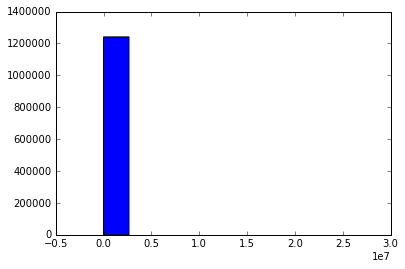

In [36]:
hist(cand_donations['TRANSACTION_AMT'])

In [37]:
cand_donations['TRANSACTION_AMT'].max()

26569530

Wow! Let's just check candidates with donations over a million USD.

We can utilize [value_counts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to give us a nice stacked chart.

In [38]:
cand_donations[cand_donations['TRANSACTION_AMT'] > 1000000]

,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,...,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
C00577130,N,M3,P,201603209011925992,15E,ORG,UNITEMIZED TOTAL,NaN,DC,00000,...,US,P,0.0,O,C,221 VAN PATTEN PKWY,NaN,BURLINGTON,VT,5408.0
C00592659,N,Q1,P,201604159012560980,15C,CAN,"GONZALEZ, VICENTE",MCALLEN,TX,785040603,...,TX,H,15.0,O,C,P.O. BOX 720603,NaN,MCALLEN,TX,785040603.0
C00607952,N,12P,P,201604149012422390,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422391,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422392,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0
C00607952,N,12P,P,201604149012422390,15C,CAN,"TRONE, DAVID",POTOMAC,MD,2.08542e+08,...,MD,H,8.0,O,C,11417 SKIPWITH LANE,NaN,POTOMAC,MD,20854.0


In [39]:
cand_donations[cand_donations['TRANSACTION_AMT'] > 1000000][
    'CAND_NAME'].value_counts()

TRONE, DAVID             4
GONZALEZ, VICENTE MR.    1
SANDERS, BERNARD         1
Name: CAND_NAME, dtype: int64

And what about smaller donations?

In [40]:
cand_donations[cand_donations['TRANSACTION_AMT'] < 200][
    'CAND_NAME'].value_counts()

SANDERS, BERNARD                                   373739
CRUZ, RAFAEL EDWARD "TED"                            5563
CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE      4766
CARSON, BENJAMIN S SR MD                             1311
BROWNLEY, JULIA                                      1132
YOUNG, TODD CHRISTOPHER                               986
JOHNSON, RONALD HAROLD                                976
BLUNT, ROY                                            786
PETERS, SCOTT                                         779
BUSH, JEB                                             773
AGUILAR, PETE                                         688
PELOSI, NANCY                                         658
RUIZ, RAUL DR.                                        572
MCCAIN, JOHN S                                        488
FEINGOLD, RUSSELL DANA                                484
BERA, AMERISH                                         431
BENNET, MICHAEL F                                     415
WALKER, SCOTT 

Since we have quite a lot of candidate data in here, I want to whittle it down to this year's election, maybe to those who have a significant amount of donors. Let's first just get it down to this year. I can't remember the column name of the year, but I can check with the columns attribute, which will return the Column index.

In [41]:
cand_donations.columns

Index(['AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP',
       'ENTITY_TP', 'NAME', 'CITY', 'STATE', 'ZIP_CODE', 'EMPLOYER',
       'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT', 'OTHER_ID',
       'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID', 'CAND_ID',
       'CAND_NAME', 'CAND_PTY_AFFILIATION', 'CAND_ELECTION_YR',
       'CAND_OFFICE_ST', 'CAND_OFFICE', 'CAND_OFFICE_DISTRICT', 'CAND_ICI',
       'CAND_STATUS', 'CAND_ST1', 'CAND_ST2', 'CAND_CITY', 'CAND_ST',
       'CAND_ZIP'],
      dtype='object')

In [42]:
cand_donations = cand_donations[
    cand_donations['CAND_ELECTION_YR'] == 2016]

Next, we can start grouping by candidate.

A Pandas [groupby object](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) operates differently than DataFrames. You can easily run aggregate groupings on them, of varying complexity. The results are a dataframe with the grouping as the index.

In [43]:
grouped = cand_donations.groupby('CAND_NAME')

In [44]:
grouped.sum()

,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CAND_NAME,,,,,,,,
"ABRAHAM, RALPH LEE DR. JR.",1.854615e+19,3.290655e+08,95500.0,9.707604e+07,3.725910e+20,185472.0,460.0,6.552058e+10
"ACHADJIAN, KHATCHIK",1.713561e+20,5.207203e+09,666509.0,9.020319e+08,3.442164e+21,1713600.0,20400.0,7.940700e+07
"ADAMS, ALMA SHEALEY",6.188432e+19,1.643391e+09,163919.0,3.301151e+08,1.271502e+21,631008.0,3756.0,8.827226e+06
"ADAMS, DESMUND DOUGLAS",1.652911e+19,4.616053e+08,53871.0,8.639716e+07,3.332253e+20,165312.0,246.0,4.124928e+06
"ADAMS, SANDY",1.491436e+19,6.431691e+08,53450.0,7.642506e+07,3.006129e+20,149184.0,444.0,2.380580e+06
"ADERHOLT, ROBERT BROWN",7.115947e+19,1.937483e+09,375857.0,3.754434e+08,1.450254e+21,723744.0,1436.0,1.276784e+07
"AGUILAR, PETE",2.874720e+20,8.423725e+09,736635.0,1.661670e+09,6.372989e+21,3175200.0,48825.0,1.455662e+08
"ALARCON, RICHARD ANTHONY MR.",1.391074e+19,2.937691e+08,44240.0,7.394546e+07,2.794298e+20,139104.0,2001.0,6.302805e+06
"ALBARRAN, CHARLENE MCARTHUR",8.668966e+18,1.400667e+08,224607.0,4.550525e+07,1.736893e+20,86688.0,86.0,3.614924e+06


In [45]:
grouped.agg({'TRANSACTION_AMT': [np.sum, np.mean], 
             'NAME': lambda x: len(set(x))})

NAME TRANSACTION_AMT              
                              <lambda>             sum          mean
CAND_NAME                                                           
ABRAHAM, RALPH LEE DR. JR.          86           95500   1038.043478
ACHADJIAN, KHATCHIK                697          666509    784.128235
ADAMS, ALMA SHEALEY                224          163919    523.702875
ADAMS, DESMUND DOUGLAS              70           53871    656.963415
ADAMS, SANDY                        67           53450    722.297297
ADERHOLT, ROBERT BROWN             291          375857   1046.955432
AGUILAR, PETE                      783          736635    467.704762
ALARCON, RICHARD ANTHONY MR.        51           44240    641.159420
ALBARRAN, CHARLENE MCARTHUR         40          224607   5223.418605
ALBERTSON, STEWART                  21           32450   1158.928571
ALLAN, SETH                         19           18136    755.666667
ALLEN, JASON EDWARD                142          155608   1030.516556
ALLEN, RICHARD W                   442          419225    836.776447
ALLEN-REESE, POGO MOCHELLO           2           13533   1127.750000
ALLIEGRO, MARK C                    78           50915    547.473118
ALLVORD, TERRY                       9            2861    286.100000
AMADOR, ANTONIO C                   15           16340   1021.250000
AMASH, JUSTIN                      233          451725   1398.529412
AMATA, AUMUA                        15           23575   1473.437500
AMODEI, MARK EUGENE                242          290014    730.513854
ANDERS, SAMUEL                       2             811     81.100000
ANDERSON, DAVID M                   55           89256    776.139130
ANGELLE, SCOTT MR.                 156          349272   1919.076923
ANGLE, SHARRON E                     8           37188   4132.000000
ANSEL, JEFFREY                       3            4567   1522.333333
ANTHONY, MALCOLM                    25           17863    525.382353
APPLEGATE, DOUGLAS LOREN            34           43530   1116.153846
ARMSTRONG-STONER, DEREK JAMES        3            3365    420.625000
ARNESS, MARK KENNETH                 4           12566   1047.166667
ARRINGTON, JODEY COOK              624          727494    899.250927
...                                ...             ...           ...
WINFREY, JANICE MARIE               38           46065   1096.785714
WINGE, KEVIN BIRDEEN                20           10150    507.500000
WINSTON, SIMON WOOD                 26           30300   1165.384615
WINTEREGG, J D                      53           51240    711.666667
WITTMAN, ROBERT J MR.              246          270080    831.015385
WOFFORD, ROSEANN                     1             250    250.000000
WOLF, AUGUST L                     274          842531   1452.639655
WOMACK, STEVE                      163          180150    896.268657
WOODALL, ROB REP.                  132          146500    957.516340
WRIGHT, DOUGLAS A.                  18           33625   1159.482759
WRIGHT, KEITH L T                  382          479795   1070.970982
WRIGHT, KENNETH W DR.               36           29800    745.000000
WYDEN, RONALD L                   2301         4775888   1567.921208
WYMAN, PHILLIP D                     6            5950    991.666667
YANDIK, WILL                       222          211900    837.549407
YARMUTH, JOHN A MR                  75          109898   1263.195402
YODER, KEVIN                       360          775912   1640.405920
YODER, SHELLI                      277          214699    608.212465
YOHO, THEODORE SCOTT               335          406977   1035.564885
YOUNG JR, LARRY DEAN                12           16200   1350.000000
YOUNG, DAVID                       343          348502    797.487414
YOUNG, DONALD E                    246          322123    920.351429
YOUNG, MICHELE LORI                  2           67921  33960.500000
YOUNG, TODD CHRISTOPHER           1480         7832010   1304.465356
YU, EUGENE MR.                  

You can also use [transform](http://pandas.pydata.org/pandas-docs/stable/groupby.html#transformation) to modify a dataframe based on a groupby (you can even do this in place!)

In [46]:
cand_donations['unique_donors'] = cand_donations.groupby(
    'CAND_NAME')['NAME'].transform(lambda x: len(set(x)))

In [47]:
cand_donations['unique_donors'].mean()

71379.678226783522

In [48]:
cand_donations['unique_donors'].median()

31390.0

In [49]:
sign_cand_donations = cand_donations[
    cand_donations['unique_donors'] > 
    cand_donations['unique_donors'].mean()]

In [50]:
sign_cand_donations.shape

(567787, 35)

In [51]:
sign_cand_donations.groupby('CAND_NAME').sum()

,IMAGE_NUM,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID,CAND_ELECTION_YR,CAND_OFFICE_DISTRICT,CAND_ZIP
CAND_NAME,,,,,,,,
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2.412947e+22,6.695439e+11,132751051.0,1.260053e+11,4.862908e+23,241327296.0,0.0,NaN
"SANDERS, BERNARD",9.033451e+22,1.915676e+12,69458204.0,4.799108e+11,1.818576e+24,903331296.0,0.0,2.423222e+09


Wait! What happened to Trump? Does this mean Trump has less than the mean value for candidates just in terms of numbers of donors? Let's see how he compares. 

In [52]:
cand_donations[cand_donations['CAND_NAME'].str.contains('TRUMP')][
    'unique_donors']

C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
             ... 
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100    4633
C00580100 

In [53]:
cand_donations[
    cand_donations['CAND_NAME'].str.contains('TRUMP')].count()

AMNDT_IND               5706
RPT_TP                  5706
TRANSACTION_PGI         5706
IMAGE_NUM               5706
TRANSACTION_TP          5706
ENTITY_TP               5706
NAME                    5706
CITY                    5706
STATE                   5704
ZIP_CODE                5706
EMPLOYER                5418
OCCUPATION              5406
TRANSACTION_DT          5706
TRANSACTION_AMT         5706
OTHER_ID                  76
TRAN_ID                 5706
FILE_NUM                5706
MEMO_CD                   77
MEMO_TEXT                  0
SUB_ID                  5706
CAND_ID                 5706
CAND_NAME               5706
CAND_PTY_AFFILIATION    5706
CAND_ELECTION_YR        5706
CAND_OFFICE_ST          5706
CAND_OFFICE             5706
CAND_OFFICE_DISTRICT    5706
CAND_ICI                5706
CAND_STATUS             5706
CAND_ST1                5706
CAND_ST2                   0
CAND_CITY               5706
CAND_ST                 5706
CAND_ZIP                5706
unique_donors 

Let's add him back in here, since we likely want to compare the main contenders.

In [54]:
sign_cand_donations = sign_cand_donations.append(
    cand_donations[
        cand_donations['CAND_NAME'].str.contains('TRUMP')])

In [55]:
sign_cand_donations.groupby('CAND_NAME').sum()['TRANSACTION_AMT']

CAND_NAME
CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE    132751051.0
SANDERS, BERNARD                                    69458204.0
TRUMP, DONALD J. / MICHAEL R. PENCE                  3395966.0
Name: TRANSACTION_AMT, dtype: float64

In [56]:
sign_cand_donations.groupby('CAND_NAME').min()[
    'unique_donors'].sort_values()

CAND_NAME
TRUMP, DONALD J. / MICHAEL R. PENCE                  4633
CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE     85089
SANDERS, BERNARD                                   159977
Name: unique_donors, dtype: int64

So we can already see some trends emerging. Bernie Sanders has the most donations, Hillary Clinton has the most money from individual donors and Donald Trump is significantly lacking in both in comparison. In fact, if you use [candidate committe details](http://www.fec.gov/fecviewer/CandidateCommitteeDetail.do) you can see he has loaned himself more than $43M to run his campaign so far.

## Now it's your turn!


Possible Next Tasks:
----------------------

- Make a histogram of each candidates donations, do you see any trends?
- Use [standard deviations](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) to remove or focus on outliers from the dataset.
- Which states have the most donors?
- Which occupations or employers are most represented by which campaigns?
- Use below committee data to find other committees for the main candidates (i.e. what other committees support Bernie, Trump and Clinton)? or even, how many people donated to which committees this year? (like the NRA or Exxon or AT&T?)

Bonus: Import the committee data and see if you can join with our original donations file, can you find what other commmittees have large and small donation groupings? Here's the import to get started.

In [ ]:
comm_header = [r for r in reader(open('data/cm_header_file.csv', 'r'))]

In [ ]:
committees = pd.read_csv('data/cm.txt', names=comm_header[0], sep='|')

In [ ]:
committees.head()